In [1]:
from grid import Grid
import numpy as np
from agent import Agent
import time
import pickle
from matplotlib import pyplot as plt

In [2]:
def create_test_grids(amount=1000, size=5):
    grids = []
    for j in range(amount):
        grids.append(Grid(size, random=True))
    with open('test_grids.pickle', 'wb') as fil:
        pickle.dump(grids, fil)


In [3]:
#create_test_grids(1000)


In [4]:
def load_test_grids():
    with open('test_grids.pickle', 'rb') as fil:
        grids = pickle.load(fil)
    return grids

In [5]:
grids = load_test_grids()

In [6]:
def test_MC_first_visit(testgrids, iterations=100, model_based=True, nn_init=False):
    reward_dist = {}
    rewards = []
    for testgrid in testgrids:
        a = Agent()
        if model_based:
            Q, policy = a.mc_first_visit_control(testgrid.copy(), iterations, nn_init=nn_init) # Q value key is (self.agent_pos,self.train.pos,list(self.other_agents.positions)[0])
            grids, action_values, reward = a.run_final_policy(testgrid.copy(), Q, nn_init=nn_init)
        else:
            reward = a.run_model_free_policy(testgrid.copy())
        if reward not in reward_dist:
            reward_dist[reward] = 1
        else:
            reward_dist[reward] += 1
        rewards.append(reward)
        
    return np.mean(rewards), reward_dist

In [7]:
iterations = [1, 3, 5, 10, 30, 100, 300, 1000]
scores = []

for it in iterations:
    score, reward_dist = test_MC_first_visit(grids, it, nn_init=True)
    print(it, score, reward_dist)
    scores.append(score)

1 -0.35710000000000003 {0: 738, -0.2: 72, -2: 138, -0.5: 22, -0.4: 13, -2.2: 4, -1.0: 2, -5: 3, -5.4: 1, -5.2: 1, -0.6000000000000001: 3, -2.4000000000000004: 2, -7.5: 1}
3 -0.2975 {0: 779, -0.2: 60, -2: 124, -0.5: 15, -2.5: 1, -0.7: 2, -0.4: 8, -0.8999999999999999: 1, -0.6000000000000001: 2, -1.0: 2, -5: 2, -0.8: 1, -1.9: 1, -0.9: 1, -5.2: 1}
5 -0.2871 {0: 800, -0.2: 54, -2: 126, -0.5: 9, -0.4: 4, -6.0: 1, -5: 1, -2.2: 2, -0.6000000000000001: 1, -1.2: 1, -1.0: 1}
10 -0.25630000000000003 {0: 805, -0.2: 58, -2: 114, -0.5: 15, -0.4: 4, -0.6000000000000001: 1, -5: 1, -1.0: 2}
30 -0.2221 {0: 819, -0.2: 62, -0.5: 15, -2: 100, -0.4: 2, -0.7: 2}
100 -0.212 {0: 819, -0.2: 70, -0.5: 16, -2: 95}
300 -0.2013 {0: 821, -0.2: 72, -0.5: 17, -2: 89, -0.4: 1}
1000 -0.1998 {0: 823, -0.2: 74, -0.5: 14, -2: 89}


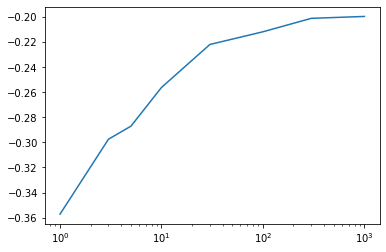

In [11]:
plt.plot(iterations, scores)
plt.xscale("log")

In [13]:
mb_scores = []

for it in iterations:
    score, reward_dist = test_MC_first_visit(grids, it, nn_init=False)
    print(it, score, reward_dist)
    mb_scores.append(score)

1 -1.0658 {0: 687, -2: 158, -5: 147, -5.5: 1, -0.5: 1, -2.5: 1, -2.2: 2, -0.2: 2, -1.5: 1}
3 -0.9107000000000001 {0: 704, -0.2: 13, -2: 142, -5: 113, -5.5: 5, -0.5: 18, -2.5: 1, -5.2: 2, -7.5: 1, -2.2: 1}
5 -0.7358000000000001 {0: 738, -2: 143, -7.5: 2, -5: 81, -0.5: 10, -2.2: 2, -0.2: 21, -5.5: 2, -5.2: 1}
10 -0.4614 {0: 773, -0.2: 34, -2: 137, -5: 32, -0.5: 21, -2.2: 1, -2.5: 1, -5.4: 1}
30 -0.2746 {0: 801, -0.2: 60, -2: 119, -0.5: 14, -0.7: 2, -5: 2, -5.2: 1, -1.0: 1}
100 -0.233 {0: 817, -0.2: 64, -0.5: 11, -2: 107, -0.7: 1}
300 -0.21430000000000002 {0: 815, -0.2: 74, -0.5: 15, -2: 96}
1000 -0.202 {0: 821, -0.2: 75, -0.5: 14, -2: 90}


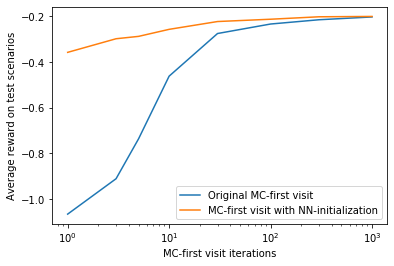

In [17]:
plt.plot(iterations, mb_scores, label = "Original MC-first visit")
plt.plot(iterations, scores, label = "MC-first visit with NN-initialization")
plt.xlabel("MC-first visit iterations")
plt.ylabel("Average reward on test scenarios")

plt.legend()
plt.xscale("log")

In [8]:
# Model based results, no init
# it, score
# 1 -1.0611
# 3 -0.9010999999999999
# 10 -0.44580000000000003
# 30 -0.2856
# 100 -0.2311
# 300 -0.21
# 1000 -0.2019

# Model based results, with init
# 1 -0.3517
# 3 -0.2993
# 5 -0.27679999999999993
# 10 -0.2627
# 30 -0.2398
# 100 -0.2105

In [10]:
print(test_MC_first_visit(grids, model_based=False))

(-0.4048, {0: 692, -2: 147, -0.2: 83, -0.5: 25, -0.4: 16, -5: 2, -2.6: 1, -2.4000000000000004: 4, -3.6: 1, -2.2: 10, -5.6: 2, -0.6000000000000001: 12, -5.2: 1, -1.0: 2, -0.8: 1, -1.1: 1})


In [20]:
print(test_MC_first_visit(grids, 0, nn_init=True))

(-0.4048, {0: 692, -2: 147, -0.2: 83, -0.5: 25, -0.4: 16, -5: 2, -2.6: 1, -2.4000000000000004: 4, -3.6: 1, -2.2: 10, -5.6: 2, -0.6000000000000001: 12, -5.2: 1, -1.0: 2, -0.8: 1, -1.1: 1})
